### Student details

Student name: **Siddharth Prince**

Student ID: **23052058**

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [1]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [2]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data 
(provided - should be completed in previous E-tivity)

In [3]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('./DataSets/01_heights_weights_sex.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

In [4]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<Axes: xlabel='Height', ylabel='Weight'>

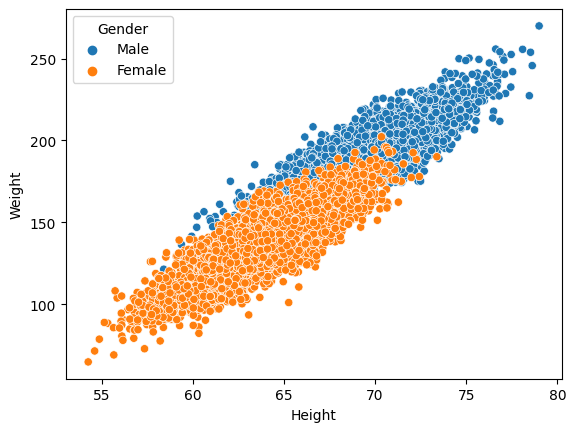

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# plt.scatter(X[:,0], X[:,1],c=y);
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=data)

### Train/Test Split 
(provided - should be completed in previous E-tivity)

In [5]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

### Train the algorithm (Task)

In [6]:
################################
# Your code here

model = Perceptron()
model.train(X_train, y_train)

### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [8]:
################################
# Your code here

from sklearn.metrics import accuracy_score

prediction = model.predict(X_test)
print(prediction)
# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, prediction)*100:.2f}%') 

[ 1 -1  1 ...  1  1  1]
Accuracy: 85.45%


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

#### Visualisation task 1

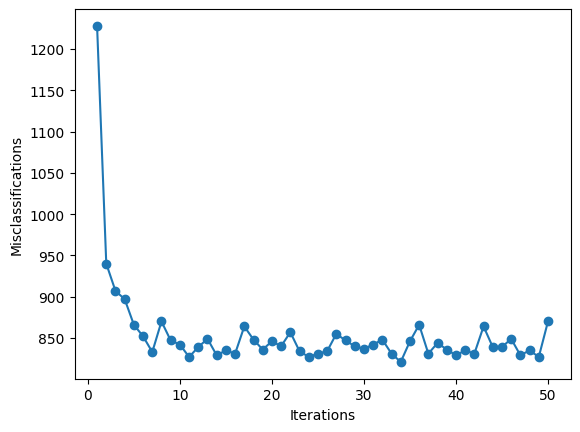

In [10]:
################################
# Your code here

plt.plot(range(1, len(model.errors_)+1), model.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

In [11]:
print(model.errors_, min(model.errors_), model.errors_.index(min(model.errors_)))

[1228, 940, 907, 897, 866, 852, 833, 870, 847, 842, 827, 839, 849, 829, 835, 831, 864, 848, 836, 846, 840, 857, 834, 827, 831, 834, 855, 847, 840, 837, 842, 848, 831, 821, 846, 866, 831, 844, 836, 829, 835, 831, 864, 839, 839, 849, 829, 835, 827, 870] 821 33


#### Visualisation task 2

Accuracy: 64.24%
Weights: [  1.56        88.08061743 -34.1463852 ]


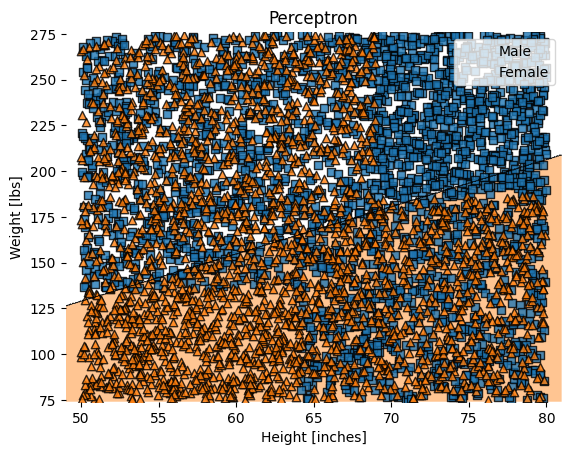

In [12]:
# Generating 5k random data points
dataList = []
for i in range(5000):
    height = round(np.random.uniform(50, 80), 6)
    weight = round(np.random.uniform(75, 275), 6)
    gender = ""
    if height >= 69 and weight >= 187:
        gender = "Male"
    elif height <= 64 and weight <= 136:
        gender = "Female"
    else:
        gender = "Male" if round(np.random.random()) == 1 else "Female"
    row = {"Gender": gender, "Height": height, "Weight": weight}
    dataList.append(row)

df = pandas.DataFrame(dataList, columns=list(data.columns))
# df.head(10)
randY = np.where(df.iloc[:,0] == "Female", 1, -1)
predsForRandom = model.predict(df.iloc[:,1:])
print(f'Accuracy: {accuracy_score(randY, predsForRandom)*100:.2f}%') 

# plt.plot(range(1, len(model.errors_)+1), model.errors_, marker='o')
# plt.xlabel('Iterations')
# plt.ylabel('Misclassifications')
# plt.show()
from mlxtend.plotting import plot_decision_regions

print('Weights: %s' % model.w_)
plot_decision_regions(np.array(df.iloc[:,1:]), randY, clf=model)
plt.title('Perceptron')
plt.xlabel('Height [inches]')
plt.ylabel('Weight [lbs]')
plt.legend(labels=["Male", "Female"], loc="upper right")
plt.show()

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses? 
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


### 1. Observations during training:
- The determining of the class happens based on the weights which is initialised to zero before the first epoch.
- The model is is trying to predict the class based on the value arrived on by performing a dot product with the feature values and weights that are determined based on the features summed with the general weight based solely on the learning rate.
  - If the weights skew negative based on the error, this value will be negative and hence the prediction will be -1 for Male.
  - If they skew positive, the predicted value will be correspondingly be +1 for Female.
- Based on the eta value i.e, the rate of learning, the weights are updated for each data point in the data set. There are two types to this:
  - If the predicted label is the same as the actual label, the formula is designed to produce a zero which makes no changes to the current weight values.
  - If the labels don't match, the weights are altered by either -0.02 or +0.02 (the eta is defined as 0.01 by default) based on the corret labels for those corresponding features i.e, +0.02 for Female (+1) and -0.02 for Male (-1).
- Thus, we can say that the weights are getting tuned based on the number of errors that are being recorded.
- With each epoch there is an initial sharp decline in the number of errors as can be seen in the graph in cell 10. But quickly the model converges and roughly oscillates around the 850 error mark and produces an accuracy of 85.45% when the model is run on the split test data.

### 2. Last epoch = best solution?
No, the last epoch has a significantly higher number of errors (870 errors) compared to the metrics from previous epochs. In fact, the epoch 33 had the least amount of errors with 821. As observed above, after a certain point the model's performance in terms of errors keep oscillating. This is probably because the rate of learning a.k.a eta set to 0.01 might be a bit bigger of a step such that it overshoots the optimum solution. Thus, the weights start to get corrected in the opposite way and again after a point it overshoots in the opposite direction. Thus, this cycle keeps continuing.

### 3. Why no zero error?
The data itself is not very well separated. As we can see from the initial scatter plot from cell 6, there is quite some overlap among both male and female genders when it comes to just judging based on their features of height and weight. It is natural that some women may be uncharacteristically taller than most men and some men may just as well be uncharacteristically be shorter than most women. There are outliers and because in real world data there will most likely be such outliers, it is always difficult to get any model to predict with 100% accuracy.  
However, with that being said, this data could be better predicted with a perceptron model that has a finer learning time and more epochs. More data could also help.

## Creating a Perceptron model class that know when to fold :)

In [13]:
class PerceptronEE(object):

    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs
        self.errorEpochTolerance = 10 # defining the number of epochs till which the model should train with a similar error rate.

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        self.toleratedEpochs = 0
        for _ in range(self.epochs):
            if self.toleratedEpochs > self.errorEpochTolerance: # Ending the model training if tolerance level has been surpassed.
                return self
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            '''
            Incrementing the tolerated epoch count if the error difference between the current 
            and last epoch is <= 20 (arbitary value chosen based on the general difference observed from the graph)
            '''
            if np.absolute(errors-self.errors_[-1]) <= 20: 
                self.toleratedEpochs += 1
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [14]:
modelEE = PerceptronEE()
modelEE.train(X_train, y_train)

In [15]:
predictionEE = modelEE.predict(X_test)

# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, predictionEE)*100:.2f}%') 

Accuracy: 87.85%


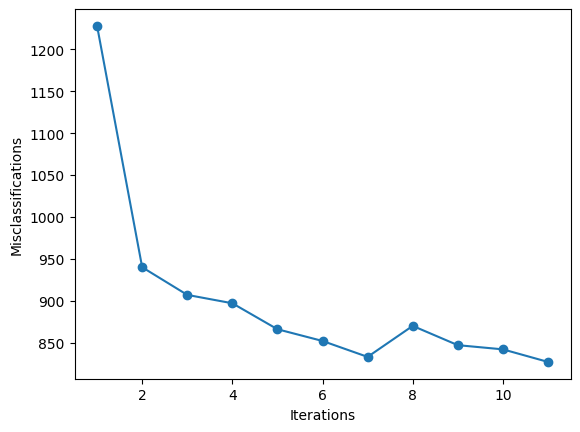

In [16]:
plt.plot(range(1, len(modelEE.errors_)+1), modelEE.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

Looks like the model finally learnt to quit when it is ahead. :D